# PIVOT 2022 Geothermal Datathon: SPE - Gulf Coast Section
## Data Modeling: Power Output


#### - Team: 
GeotherML    
    
#### - Team Members:
- Antonio Dagnino
- Andres Calvo
- Oliver Rojas
- Yusuf Falola
- Chandryl Paterne    
    
#### - Contents:

   - **Data Modeling: Power Output**
       - Import inputs and outputs
       - Train / Test split
       - Scale Data
       - Create Neural Network
       - Fit the Model
       

   - **Evaluation Metrics**
       - MAE
       - MSE
       - RMSE
       - Explained variance score
       - Compare mean values per year: Predictions Vs Real



### Data Modeling: Power Output

- Data Modeling Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [2]:
# Customize Plots
rcParams['figure.figsize'] = 14,8
rcParams['axes.titlesize'] = 15
rcParams['font.size']=10
sns.set_style('whitegrid')

#show all columns in Jupyter Notebook
pd.set_option("display.max_columns", None)

In [3]:
inputs = pd.read_csv('inputs.csv',index_col=0)
df_Power = pd.read_csv('df_Power.csv',index_col=0)

- Train / Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(inputs.values,df_Power.values,test_size=0.2,random_state=101)

- Scale Data

In [5]:
scaler = MinMaxScaler()

In [6]:
X_train = scaler.fit_transform(X_train)

In [7]:
X_test = scaler.transform(X_test)

In [8]:
X_train.shape

(36388, 37)

In [9]:
X_test.shape

(9097, 37)

- Create Neural Network

In [10]:
model = Sequential()

model.add(Dense(37,activation='relu'))

model.add(Dense(37,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(37,activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(37,activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(20))


model.compile(optimizer='adam',loss='mse')

- Fit the Model

In [11]:
# - Hyperparameter Tunning:

batchsize = 256
epochs = 400

In [12]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [13]:
model.fit(x=X_train,
        y=y_train,
        validation_data=(X_test,y_test),
        batch_size=batchsize,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stop])

Epoch 1/400
143/143 [==============================] - 1s 3ms/step - loss: 197731.0312 - val_loss: 167496.3125
Epoch 2/400
143/143 [==============================] - 0s 3ms/step - loss: 188748.7812 - val_loss: 165035.8906
Epoch 3/400
143/143 [==============================] - 0s 2ms/step - loss: 185646.2812 - val_loss: 161184.0156
Epoch 4/400
143/143 [==============================] - 0s 2ms/step - loss: 181489.0000 - val_loss: 158307.5312
Epoch 5/400
143/143 [==============================] - 0s 3ms/step - loss: 180159.1719 - val_loss: 157601.1406
Epoch 6/400
143/143 [==============================] - 0s 3ms/step - loss: 179556.9688 - val_loss: 157576.0156
Epoch 7/400
143/143 [==============================] - 0s 3ms/step - loss: 178928.7969 - val_loss: 157077.4688
Epoch 8/400
143/143 [==============================] - 0s 2ms/step - loss: 179027.2188 - val_loss: 157055.5625
Epoch 9/400
143/143 [==============================] - 0s 2ms/step - loss: 179094.1406 - val_loss: 157042.9844
E

143/143 [==============================] - 0s 2ms/step - loss: 161815.6562 - val_loss: 146302.2344
Epoch 74/400
143/143 [==============================] - 0s 2ms/step - loss: 159929.1562 - val_loss: 146466.4688
Epoch 75/400
143/143 [==============================] - 0s 2ms/step - loss: 160846.4844 - val_loss: 145681.7031
Epoch 76/400
143/143 [==============================] - 0s 3ms/step - loss: 160958.5156 - val_loss: 145859.0781
Epoch 77/400
143/143 [==============================] - 0s 2ms/step - loss: 160042.9688 - val_loss: 145717.5000
Epoch 78/400
143/143 [==============================] - 0s 2ms/step - loss: 159604.9375 - val_loss: 146033.2344
Epoch 79/400
143/143 [==============================] - 0s 2ms/step - loss: 158873.0156 - val_loss: 148611.0469
Epoch 80/400
143/143 [==============================] - 0s 2ms/step - loss: 158029.6250 - val_loss: 146790.6406
Epoch 81/400
143/143 [==============================] - 0s 2ms/step - loss: 159219.5781 - val_loss: 145761.7656
Epoch

143/143 [==============================] - 0s 2ms/step - loss: 145931.5625 - val_loss: 145100.7188
Epoch 146/400
143/143 [==============================] - 0s 2ms/step - loss: 147045.5156 - val_loss: 144237.6250
Epoch 147/400
143/143 [==============================] - 0s 2ms/step - loss: 148345.6094 - val_loss: 143268.4219
Epoch 148/400
143/143 [==============================] - 0s 2ms/step - loss: 148633.0781 - val_loss: 143940.7656
Epoch 149/400
143/143 [==============================] - 0s 2ms/step - loss: 146721.9219 - val_loss: 142285.2500
Epoch 150/400
143/143 [==============================] - 0s 2ms/step - loss: 148076.6250 - val_loss: 145668.3594
Epoch 151/400
143/143 [==============================] - 0s 2ms/step - loss: 146325.0000 - val_loss: 144386.6562
Epoch 152/400
143/143 [==============================] - 0s 2ms/step - loss: 146997.0000 - val_loss: 142651.5625
Epoch 153/400
143/143 [==============================] - 0s 2ms/step - loss: 148220.3906 - val_loss: 142408.67

In [14]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

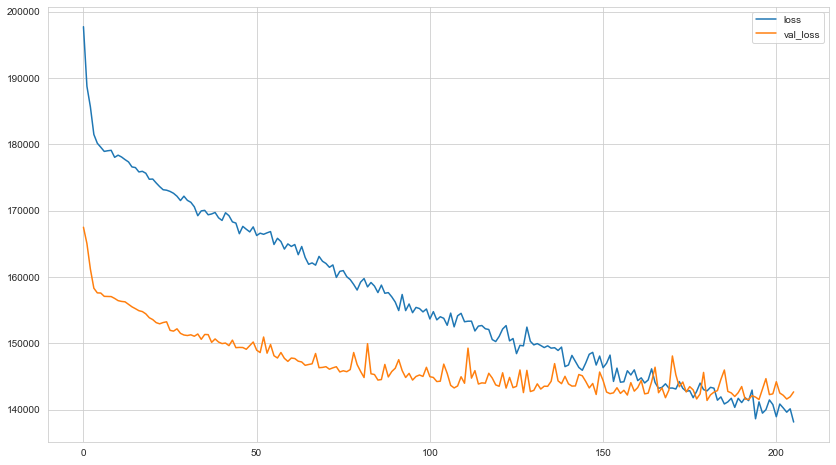

In [15]:
losses.plot()

### Evaluation Metrics

In [16]:
def eval_metrics_timeseries(real_values,pred,name='Variable'):
    print(f"""
        ------- {name} ------
        
MAE: {mean_absolute_error(real_values,pred):.3f},
MSE: {mean_squared_error(real_values,pred):.3f},
RMSE: {np.sqrt(mean_squared_error(real_values,pred)):.3f},
Explained Variance Score: {explained_variance_score(real_values,pred)*100:.3f}%,

Compare Mean values per Year: Predictions VS Real:

{pd.concat([pd.DataFrame(real_values).mean(),pd.DataFrame(pred).mean()],axis=1,keys=['Avg real',' Avg Pred'],names='Year')}
    """)

In [17]:
predictions_Power = model.predict(X_test)

In [18]:
eval_metrics_timeseries(y_test,predictions_Power,name='Power Output (KW)')


        ------- Power Output (KW) ------
        
MAE: 140.111,
MSE: 142678.172,
RMSE: 377.728,
Explained Variance Score: 15.056%,

Compare Mean values per Year: Predictions VS Real:

Year    Avg real    Avg Pred
0     235.516815  197.846909
1     159.037330  145.970200
2     142.754770  133.499100
3     132.279116  125.404968
4     124.666695  119.338409
5     118.639608  114.546120
6     113.511415  110.557426
7     109.183204  107.148712
8     105.539911  104.187347
9     102.462820  101.655937
10     99.755893   99.447411
11     97.355710   97.415871
12     95.211355   95.590134
13     93.310488   93.961838
14     91.637579   92.585777
15     90.086503   91.233337
16     88.629380   89.957314
17     87.246608   88.868340
18     85.964395   87.763962
19     84.780345   86.761467
    


<AxesSubplot:title={'center':'Avg Power Output: Predicted Vs Real values'}>

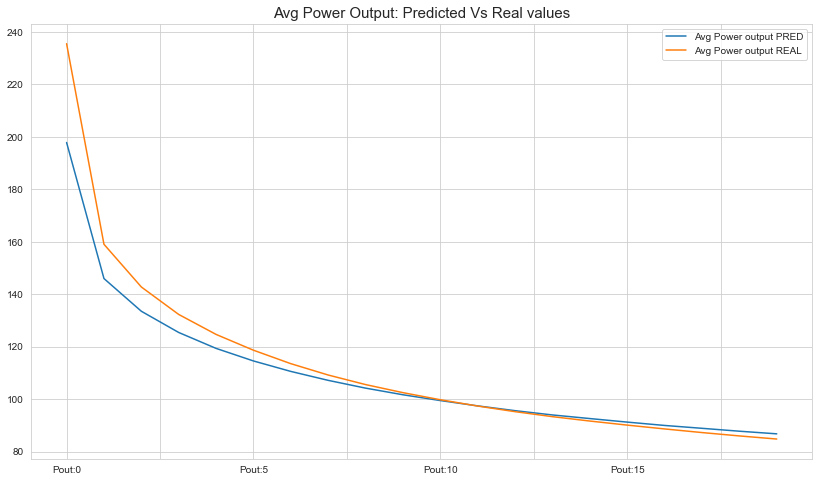

In [19]:
pd.DataFrame(predictions_Power,columns=df_Power.columns).mean().plot(legend=True,label='Avg Power output PRED',
                                                                           title='Avg Power Output: Predicted Vs Real values')
pd.DataFrame(y_test,columns=df_Power.columns).mean().plot(legend=True,label='Avg Power output REAL')

### END